In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import math
import xlsxwriter
import os

In [2]:
stock = "AAL"
xls = pd.ExcelFile('./Tweets/'+stock+'.xlsx')


In [3]:
df = pd.read_excel(xls, header = 0,encoding='latin-1', sheet_name = "Stream")
df.head()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,...,Listed,Tweet language (ISO 639-1),Tweet Url,Is a RT,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs
0,743011665663295491,2016-06-15,09:26,Scutify,scutify,Scuttlebutt + Finance = Scutify. The most inno...,"Why American Airlines Group Inc $AAL, Novo Nor...",NaN,NaN,NaN,...,109.0,en,http://www.twitter.com/scutify/status/74301166...,False,NaN,NaN,NaN,"$AAL,$NVO,$SYF",NaN,https://www.scutify.com/articles/2016-06-15-wh...
1,742994700563558400,2016-06-15,08:18,Halifax ShareDealing,halifaxbroker,Authorised and regulated by the Financial Cond...,Yesterday's top #FTSE100 fallers - Anglo Ameri...,NaN,NaN,53.79648,...,43.0,en,http://www.twitter.com/halifaxbroker/status/74...,False,NaN,NaN,#FTSE100,"$AAL,$ANTO,$SKY,$BKG,$BLT",NaN,NaN
2,742991573181423618,2016-06-15,08:06,TradeWithSuper,TradeWithSuper,The Twitter handle 4 @TopFiveTraders that foll...,SA_QuickIdeas: 5 Large-Cap Stocks With The Low...,NaN,NaN,NaN,...,110.0,en,http://www.twitter.com/TradeWithSuper/status/7...,False,NaN,NaN,NaN,"$AAL,$DAL,$HPQ,$TTM,$UAL,$VLO",NaN,http://seekingalpha.com/article/3982103-5-larg...
3,742991250899513345,2016-06-15,08:04,WKRB News,WKRBNews,WKRB News - News and Analysis. http://t.co/n4Q...,JPMorgan Chase &amp; Co. Reiterates Underweigh...,NaN,NaN,NaN,...,124.0,de,http://www.twitter.com/WKRBNews/status/7429912...,False,NaN,NaN,NaN,$AAL,NaN,http://ift.tt/1UTFj1G
4,742990282380173313,2016-06-15,08:01,ProVesting,ProVesting,NaN,$DAL $AAL:\n\n5 Large-Cap Stocks With The Lowe...,NaN,NaN,NaN,...,140.0,en,http://www.twitter.com/ProVesting/status/74299...,False,NaN,NaN,NaN,"$DAL,$AAL",NaN,http://www.StockNewsWires.com/2016/06/15/dal-a...


In [4]:
df = df[(df['Date'] >= '2016-04-01') & (df['Date'] <= '2016-06-14')]
df.tail()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,...,Listed,Tweet language (ISO 639-1),Tweet Url,Is a RT,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs
5733,715721241710227457,2016-04-01,02:03,BreakingStocksNews,NewsToDesk,News about Stocks,$AAL:\n\nAmerican Airlines Group’s (AAL) “Outp...,NaN,NaN,NaN,...,129.0,en,http://www.twitter.com/NewsToDesk/status/71572...,False,NaN,NaN,NaN,$AAL,NaN,http://StockNewsHour.com/aal-american-airlines...
5734,715717917606862850,2016-04-01,01:50,US Consumer News,ConsumerFeed,News for Consumers in a Changing World,American Airlines Group's outperform rating re...,NaN,NaN,NaN,...,532.0,en,http://www.twitter.com/ConsumerFeed/status/715...,False,NaN,NaN,#AAL,$AAL,NaN,http://ift.tt/1MFrvdE
5735,715717224686813184,2016-04-01,01:47,China Invest,ChinaInvest,An investor in Hong Kong focusing in China sto...,RT SeekingAlpha: Airplane And Hospitality Indu...,1.0,1.0,NaN,...,857.0,en,http://www.twitter.com/ChinaInvest/status/7157...,False,NaN,NaN,NaN,"$HOT,$MAR,$JBLU,$DAL,$LUV,$AAL,$ALK",NaN,http://seekingalpha.com/article/3962425-airpla...
5736,715716602730323968,2016-04-01,01:45,MarketBeatCom,RatingsNetwork,Formerly Analyst Ratings Network. http://t.co/...,American Airlines Group's outperform rating re...,NaN,1.0,NaN,...,512.0,en,http://www.twitter.com/RatingsNetwork/status/7...,False,NaN,NaN,#AAL,$AAL,NaN,http://ift.tt/1MFrvdE
5737,715692661068468224,2016-04-01,00:10,Yamasuta,YamasutaTrader,Yamasuta is an algorithmic stock analysis soft...,"$AAL - BUY Signal at 41.38 on Mar 30, 16 By ht...",NaN,NaN,NaN,...,50.0,en,http://www.twitter.com/YamasutaTrader/status/7...,False,NaN,NaN,"#Stockmarket,#trading,#trade,#investing",$AAL,NaN,http://YaMasuta.com


In [5]:
def sentimentScore(Tweet):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in Tweet:
        vs = analyzer.polarity_scores(sentence)
        print("Vader score: " + str(vs))
        #print("{: <65} {}".format(sentence, str(vs))) 
        #NOTE! I blocked the second print command so the sentences are
        #left out in the cell below, purely for clarity reasons
        results.append(vs)
    return results

In [7]:
Tweet = df['Tweet content']
Tweet.head()

17    #AmericanAirlines Cabin Chaos Triggers Turbule...
18    Explore #fundamental numbers and pros and cons...
19    Expansion BD https://t.co/5WSaOfRETR $IMGN $CO...
20    $AAL big time shorts and options traders seem ...
21    Wondering about risks of $AAL? The 21-day vola...
Name: Tweet content, dtype: object

In [8]:
df_results = pd.DataFrame(sentimentScore(Tweet))

Vader score: {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5719}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2732}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2732}
Vader score: {'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.6249}
Vader score: {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.5256}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.4404}
Vader score: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.4215}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.4215}
V

Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.056, 'neu': 0.944, 'pos': 0.0, 'compound': -0.0772}
Vader score: {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.0772}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.4404}
Vader score: {'neg': 0.0, 'neu':

Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.5106}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg'

Vader score: {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5267}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2732}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.121, 'neu': 0.404, 'pos': 0.475, 'compound': 0.791}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.25}
Vader score: {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
Vader score: {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.743}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {

Vader score: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}
Vader score: {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.4019}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4939}
Vader score: {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.4019}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.4019}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.34}
Vader score: {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.4019}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'n

Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.296}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.296}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
Vader sc

Vader score: {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}
Vader score: {'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.2732}
Vader score: {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}
Vader score: {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}
Vader score: {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.2732}
Vader score: {'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7964}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.4184}
Vader score: {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.3412}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.4753}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Vader score: {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.5562}
Vader score: {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5411}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.4215}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.128}
Vader score: {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.128}
Vader score: {'neg': 0.0, 

In [9]:
df_tweets = pd.merge(df, df_results, left_index=True, right_index=True)
df_tweets.tail()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,...,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs,compound,neg,neu,pos
5716,715846153775005698,2016-04-01,10:19,Dakota Financial,dakotafinancial,NaN,Anglo American plc $AAL PT Raised to GBX 350 a...,NaN,NaN,NaN,...,NaN,NaN,NaN,$AAL,NaN,http://ift.tt/1Ux9q4c,0.0000,0.0,1.000,0.000
5717,715846135475212288,2016-04-01,10:19,Sleek Money,SleekMoneycom,NaN,Anglo American plc $AAL PT Raised to GBX 350 a...,NaN,NaN,NaN,...,NaN,NaN,NaN,$AAL,NaN,http://ift.tt/1SEz83d,0.3818,0.0,0.809,0.191
5718,715839658781974530,2016-04-01,09:54,thunderheart,PositvePsych,"First of all, you have to realize what type of...",RT @theflynews: Delta Air Lines downgraded to ...,NaN,1.0,NaN,...,@theflynews,@theflynews,NaN,"$DAL,$AAL,$UAL,$HA,$LUV,$ALK,$JBLU,$SAVE,$SKYW",NaN,http://bit.ly/1MYUtQF,0.0000,0.0,1.000,0.000
5719,715839423045365760,2016-04-01,09:53,The Fly,theflynews,First In Stock News,Delta Air Lines downgraded to Hold from Buy at...,1.0,1.0,NaN,...,NaN,NaN,NaN,"$DAL,$AAL,$UAL,$HA,$LUV,$ALK,$JBLU,$SAVE,$SKYW",NaN,http://bit.ly/1MYUtQF,0.3818,0.0,0.809,0.191
5720,715833380479377409,2016-04-01,09:29,MarketBeatCom,RatingsNetwork,Formerly Analyst Ratings Network. http://t.co/...,Anglo American plc's underperform rating reite...,NaN,NaN,NaN,...,NaN,NaN,#AAL,$AAL,NaN,http://ift.tt/1Tn8L40,0.0000,0.0,1.000,0.000


In [10]:
df_tweets['datetime'] = pd.to_datetime(df_tweets['Date']) # change of Date column to datetime columns
df_tweet_SA = df_tweets.set_index('datetime') # creates a new dataframe 'df_Dc' with the new index column datetime 
df_tweet_SA.drop(['Date'], axis=1, inplace=True) #drops the original 'Date' column from the dataframe
df_tweet_SA.head()

,Tweet Id,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,Longitude,...,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs,compound,neg,neu,pos
datetime,,,,,,,,,,,,,,,,,,,,,
2016-06-14,742866928872476672,23:50,Airlines News,_airlines_,Track all of the latest Airlines News with Owl...,#AmericanAirlines Cabin Chaos Triggers Turbule...,NaN,NaN,NaN,NaN,...,NaN,NaN,#AmericanAirlines,$AAL,NaN,http://owler.us/aaQRCN,0.0000,0.000,1.000,0.000
2016-06-14,742864743002574848,23:42,1 min Stock Insights,1MinuteStock,"Flash, 1 minute stock insights about trending ...",Explore #fundamental numbers and pros and cons...,NaN,NaN,NaN,NaN,...,NaN,NaN,#fundamental,$AAL,NaN,https://unicornbay.com/t/AAL.US?utm_medium=twe...,0.3182,0.000,0.887,0.113
2016-06-14,742862512878682112,23:33,dailystockplays.com,DailyStockPlays,"Live Day Trading Calls, Daily Swing Trading Li...",Expansion BD https://t.co/5WSaOfRETR $IMGN $CO...,NaN,NaN,37.25022,-119.75126,...,NaN,NaN,NaN,"$IMGN,$COF,$LYG,$STNG,$LUV,$ALLY,$SMFG,$ING,$M...",NaN,http://www.dailystockplays.com/Expansion-BD-20...,0.0000,0.000,1.000,0.000
2016-06-14,742856061606985728,23:07,Sarcasm Bot,sarcbot,Don't take this bot seriously. It was an exper...,$AAL big time shorts and options traders seem ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,$AAL,NaN,NaN,0.0000,0.000,1.000,0.000
2016-06-14,742852413929836544,22:53,1 min Stock Insights,1MinuteStock,"Flash, 1 minute stock insights about trending ...",Wondering about risks of $AAL? The 21-day vola...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,$AAL,NaN,https://unicornbay.com/t/AAL.US?utm_medium=twe...,0.2846,0.067,0.829,0.104


In [11]:
df_tweet_SA = df_tweets[['Date','Tweet content','Followers', 
               'Symbols','compound','neg','neu','pos','datetime']]
df_tweet_SA.head()

,Date,Tweet content,Followers,Symbols,compound,neg,neu,pos,datetime
17,2016-06-14,#AmericanAirlines Cabin Chaos Triggers Turbule...,31.0,$AAL,0.0000,0.000,1.000,0.000,2016-06-14
18,2016-06-14,Explore #fundamental numbers and pros and cons...,1398.0,$AAL,0.3182,0.000,0.887,0.113,2016-06-14
19,2016-06-14,Expansion BD https://t.co/5WSaOfRETR $IMGN $CO...,4864.0,"$IMGN,$COF,$LYG,$STNG,$LUV,$ALLY,$SMFG,$ING,$M...",0.0000,0.000,1.000,0.000,2016-06-14
20,2016-06-14,$AAL big time shorts and options traders seem ...,163.0,$AAL,0.0000,0.000,1.000,0.000,2016-06-14
21,2016-06-14,Wondering about risks of $AAL? The 21-day vola...,1398.0,$AAL,0.2846,0.067,0.829,0.104,2016-06-14


In [12]:
df_tweet_SA = df_tweet_SA[(df_tweet_SA[['compound']] != 0).all(axis=1)]
df_tweet_SA = df_tweet_SA[np.isfinite(df_tweet_SA['Followers'])]
len(df_tweet_SA)

2449

In [13]:
df_tweet_SA['Compound_multiplied'] = df_tweet_SA['compound']*df_tweet_SA['Followers']
df_tweet_SA.tail()

,Date,Tweet content,Followers,Symbols,compound,neg,neu,pos,datetime,Compound_multiplied
5712,2016-04-01,RT @AnalystWire: Deutsche Bank Downgrades Amer...,433.0,"$AAL,$DAL,$UAL,$HA",0.3818,0.0,0.833,0.167,2016-04-01,165.3194
5713,2016-04-01,RT @AnalystWire: Deutsche Bank Downgrades Amer...,667.0,"$AAL,$DAL,$UAL,$HA",0.4003,0.0,0.870,0.130,2016-04-01,267.0001
5715,2016-04-01,Deutsche Bank Downgrades American Airlines $AA...,2972.0,"$AAL,$DAL,$UAL,$HA",0.3818,0.0,0.794,0.206,2016-04-01,1134.7096
5717,2016-04-01,Anglo American plc $AAL PT Raised to GBX 350 a...,848.0,$AAL,0.3818,0.0,0.809,0.191,2016-04-01,323.7664
5719,2016-04-01,Delta Air Lines downgraded to Hold from Buy at...,12358.0,"$DAL,$AAL,$UAL,$HA,$LUV,$ALK,$JBLU,$SAVE,$SKYW",0.3818,0.0,0.809,0.191,2016-04-01,4718.2844


In [14]:
x_1 = df_tweet_SA[['Compound_multiplied']].values.astype(float)
scaler = StandardScaler().fit(x_1)
scaled_data = scaler.transform(x_1)
df_tweet_SA['Compound_multiplied_scaled'] = scaled_data
df_tweet_SA.tail()


,Date,Tweet content,Followers,Symbols,compound,neg,neu,pos,datetime,Compound_multiplied,Compound_multiplied_scaled
5712,2016-04-01,RT @AnalystWire: Deutsche Bank Downgrades Amer...,433.0,"$AAL,$DAL,$UAL,$HA",0.3818,0.0,0.833,0.167,2016-04-01,165.3194,0.023733
5713,2016-04-01,RT @AnalystWire: Deutsche Bank Downgrades Amer...,667.0,"$AAL,$DAL,$UAL,$HA",0.4003,0.0,0.870,0.130,2016-04-01,267.0001,0.028947
5715,2016-04-01,Deutsche Bank Downgrades American Airlines $AA...,2972.0,"$AAL,$DAL,$UAL,$HA",0.3818,0.0,0.794,0.206,2016-04-01,1134.7096,0.073441
5717,2016-04-01,Anglo American plc $AAL PT Raised to GBX 350 a...,848.0,$AAL,0.3818,0.0,0.809,0.191,2016-04-01,323.7664,0.031858
5719,2016-04-01,Delta Air Lines downgraded to Hold from Buy at...,12358.0,"$DAL,$AAL,$UAL,$HA,$LUV,$ALK,$JBLU,$SAVE,$SKYW",0.3818,0.0,0.809,0.191,2016-04-01,4718.2844,0.257199


In [15]:
df_daily_mean=(df_tweet_SA.groupby(df_tweet_SA.datetime).mean())
df_daily_mean.tail()

,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled
datetime,,,,,,,
2016-06-10,1380.500000,0.336306,0.041435,0.786855,0.171710,519.753571,0.041908
2016-06-11,8530.400000,0.268460,0.041200,0.814800,0.144000,-991.525200,-0.035587
2016-06-12,245.333333,0.372067,0.000000,0.847667,0.152333,99.156733,0.020341
2016-06-13,730.953846,0.189440,0.061846,0.786615,0.151538,44.684040,0.017547
2016-06-14,6799.546512,-0.084880,0.131419,0.765523,0.103047,-2221.162362,-0.098640


In [16]:
start = dt.datetime(2016, 4, 2)
end =  dt.datetime(2016, 6, 14) #dt.datetime.now() 

df_stock = web.DataReader(stock, 'yahoo', start, end)

In [17]:
df_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-01,40.160000,39.270000,40.130001,39.520000,11244100.0,38.267448
2016-04-04,40.240002,39.150002,39.810001,39.369999,7831200.0,38.122200
2016-04-05,39.380001,38.740002,39.130001,38.930000,7648400.0,37.696152
2016-04-06,39.070000,38.340000,39.070000,38.900002,5645500.0,37.667107
2016-04-07,39.049999,37.910000,38.660000,38.360001,8206700.0,37.144211


In [18]:
df_stock.columns = ['High','Low','Open','Close','Volume_stock','Adj_Close_stock']
df_stock['Pct_change_stock'] = (df_stock['Close'] - df_stock['Open']) / df_stock['Open'] * 100.0

In [19]:
stock_1 = df_stock[['Pct_change_stock']].values.astype(float)
scaler = StandardScaler().fit(stock_1)
scaled_data = scaler.transform(stock_1)
df_stock['Pct_change_stock_scaled'] = scaled_data
df_stock.tail()

,High,Low,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled
Date,,,,,,,,
2016-06-08,32.970001,32.220001,32.630001,32.509998,8173100.0,31.570631,-0.367768,0.067311
2016-06-09,33.580002,32.250000,32.250000,33.400002,8188300.0,32.434917,3.565896,2.305596
2016-06-10,33.480000,32.639999,32.799999,33.139999,8252300.0,32.182426,1.036586,0.866399
2016-06-13,32.990002,31.639999,32.990002,31.799999,9225600.0,30.881145,-3.607161,-1.775928
2016-06-14,31.969999,30.020000,31.809999,30.360001,13802900.0,29.482754,-4.558311,-2.317140


In [20]:
df_full = pd.concat([df_stock[['Open','Close','Volume_stock','Adj_Close_stock', 'Pct_change_stock', 'Pct_change_stock_scaled']],\
                     df_daily_mean], axis=1, sort=False)
df_full.tail()

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled
2016-06-10,32.799999,33.139999,8252300.0,32.182426,1.036586,0.866399,1380.500000,0.336306,0.041435,0.786855,0.171710,519.753571,0.041908
2016-06-11,NaN,NaN,NaN,NaN,NaN,NaN,8530.400000,0.268460,0.041200,0.814800,0.144000,-991.525200,-0.035587
2016-06-12,NaN,NaN,NaN,NaN,NaN,NaN,245.333333,0.372067,0.000000,0.847667,0.152333,99.156733,0.020341
2016-06-13,32.990002,31.799999,9225600.0,30.881145,-3.607161,-1.775928,730.953846,0.189440,0.061846,0.786615,0.151538,44.684040,0.017547
2016-06-14,31.809999,30.360001,13802900.0,29.482754,-4.558311,-2.317140,6799.546512,-0.084880,0.131419,0.765523,0.103047,-2221.162362,-0.098640


In [21]:
df_full['Followers'].fillna(df_full['Followers'].mean(), inplace=True)
df_full['compound'].fillna(df_full['compound'].mean(), inplace=True)
df_full['neg'].fillna(df_full['neg'].mean(), inplace=True)
df_full['neu'].fillna(df_full['neu'].mean(), inplace=True)
df_full['pos'].fillna(df_full['pos'].mean(), inplace=True)
df_full['Compound_multiplied'].fillna(df_full['Compound_multiplied'].mean(), inplace=True)
df_full['Compound_multiplied_scaled'].fillna(df_full['Compound_multiplied_scaled'].mean(), inplace=True)

df_full.tail()

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled
2016-06-10,32.799999,33.139999,8252300.0,32.182426,1.036586,0.866399,1380.500000,0.336306,0.041435,0.786855,0.171710,519.753571,0.041908
2016-06-11,NaN,NaN,NaN,NaN,NaN,NaN,8530.400000,0.268460,0.041200,0.814800,0.144000,-991.525200,-0.035587
2016-06-12,NaN,NaN,NaN,NaN,NaN,NaN,245.333333,0.372067,0.000000,0.847667,0.152333,99.156733,0.020341
2016-06-13,32.990002,31.799999,9225600.0,30.881145,-3.607161,-1.775928,730.953846,0.189440,0.061846,0.786615,0.151538,44.684040,0.017547
2016-06-14,31.809999,30.360001,13802900.0,29.482754,-4.558311,-2.317140,6799.546512,-0.084880,0.131419,0.765523,0.103047,-2221.162362,-0.098640


In [22]:
df_full[[ "Volume_stock", "Adj_Close_stock", "Pct_change_stock", "Pct_change_stock_scaled"]] = \
df_full[[ "Volume_stock", "Adj_Close_stock", "Pct_change_stock", "Pct_change_stock_scaled"]] \
.interpolate(method='linear', limit_direction='forward', axis=0)
df_full.tail()

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled
2016-06-10,32.799999,33.139999,8.252300e+06,32.182426,1.036586,0.866399,1380.500000,0.336306,0.041435,0.786855,0.171710,519.753571,0.041908
2016-06-11,NaN,NaN,8.576733e+06,31.748666,-0.511330,-0.014376,8530.400000,0.268460,0.041200,0.814800,0.144000,-991.525200,-0.035587
2016-06-12,NaN,NaN,8.901167e+06,31.314906,-2.059245,-0.895152,245.333333,0.372067,0.000000,0.847667,0.152333,99.156733,0.020341
2016-06-13,32.990002,31.799999,9.225600e+06,30.881145,-3.607161,-1.775928,730.953846,0.189440,0.061846,0.786615,0.151538,44.684040,0.017547
2016-06-14,31.809999,30.360001,1.380290e+07,29.482754,-4.558311,-2.317140,6799.546512,-0.084880,0.131419,0.765523,0.103047,-2221.162362,-0.098640


In [23]:
df_full['Predicted_change_stock'] = df_full['Pct_change_stock'].shift(-1)
df_full.head()

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock
2016-04-01,40.130001,39.520000,1.124410e+07,38.267448,-1.520061,-0.588352,3840.046512,0.214360,0.058302,0.805488,0.136233,721.391419,0.052247,-1.381793
2016-04-02,NaN,NaN,1.010647e+07,38.219032,-1.381793,-0.509677,13116.086957,0.270387,0.047174,0.815957,0.136913,2799.273065,0.158797,-1.243524
2016-04-03,NaN,NaN,8.968833e+06,38.170616,-1.243524,-0.431001,8120.142857,0.442921,0.008786,0.825786,0.165429,4022.892986,0.221541,-1.105256
2016-04-04,39.810001,39.369999,7.831200e+06,38.122200,-1.105256,-0.352325,5260.681818,0.097152,0.067614,0.798818,0.133591,1935.749030,0.114517,-0.511119
2016-04-05,39.130001,38.930000,7.648400e+06,37.696152,-0.511119,-0.014256,1824.033333,0.138490,0.061833,0.800000,0.138167,312.512317,0.031281,-0.435112


In [24]:
buy_or_sell = []
for row in df_full['Pct_change_stock']:
    if row >= 0:
        buy_or_sell.append(1)
    elif row < 0:
        buy_or_sell.append(-1) 
df_full['Buy/Sell'] = buy_or_sell
df_full['Buy/Sell'] = df_full['Buy/Sell'].shift(-1)
df_full.tail()

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell
2016-06-10,32.799999,33.139999,8.252300e+06,32.182426,1.036586,0.866399,1380.500000,0.336306,0.041435,0.786855,0.171710,519.753571,0.041908,-0.511330,-1.0
2016-06-11,NaN,NaN,8.576733e+06,31.748666,-0.511330,-0.014376,8530.400000,0.268460,0.041200,0.814800,0.144000,-991.525200,-0.035587,-2.059245,-1.0
2016-06-12,NaN,NaN,8.901167e+06,31.314906,-2.059245,-0.895152,245.333333,0.372067,0.000000,0.847667,0.152333,99.156733,0.020341,-3.607161,-1.0
2016-06-13,32.990002,31.799999,9.225600e+06,30.881145,-3.607161,-1.775928,730.953846,0.189440,0.061846,0.786615,0.151538,44.684040,0.017547,-4.558311,-1.0
2016-06-14,31.809999,30.360001,1.380290e+07,29.482754,-4.558311,-2.317140,6799.546512,-0.084880,0.131419,0.765523,0.103047,-2221.162362,-0.098640,NaN,NaN


In [25]:
pd.DataFrame.describe(df_full)

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell
count,52.000000,52.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,74.000000,74.000000
mean,35.153846,34.979423,9.785516e+06,33.840344,-0.501903,-0.009012,3942.656729,0.212233,0.056430,0.797205,0.146366,352.077028,0.033310,-0.488144,-0.243243
std,3.511142,3.519486,3.157759e+06,3.343880,1.575422,0.896427,5151.521635,0.133653,0.029275,0.036890,0.040566,1798.645402,0.092230,1.581633,0.976586
min,30.770000,30.360001,5.018200e+06,29.482754,-5.089362,-2.619312,79.500000,-0.234000,0.000000,0.675000,0.000000,-9692.211305,-0.481739,-5.089362,-1.000000
25%,32.220000,32.092499,7.359567e+06,30.994443,-1.312659,-0.470339,1763.906250,0.129593,0.037415,0.780016,0.120656,70.599333,0.018876,-1.211461,-1.000000
50%,33.260000,33.174999,9.096200e+06,32.075611,-0.435112,0.028992,2573.500000,0.218967,0.054844,0.797857,0.137909,430.498725,0.037331,-0.418915,-1.000000
75%,38.722501,38.557500,1.162440e+07,37.316896,0.460723,0.538729,4438.380309,0.282844,0.073474,0.817072,0.169417,944.042574,0.063665,0.482330,1.000000
max,41.360001,41.340000,2.093950e+07,40.029770,3.565896,2.305596,38754.936508,0.646040,0.133545,0.888500,0.281500,4079.469863,0.224442,3.565896,1.000000


C:\Users\shima\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


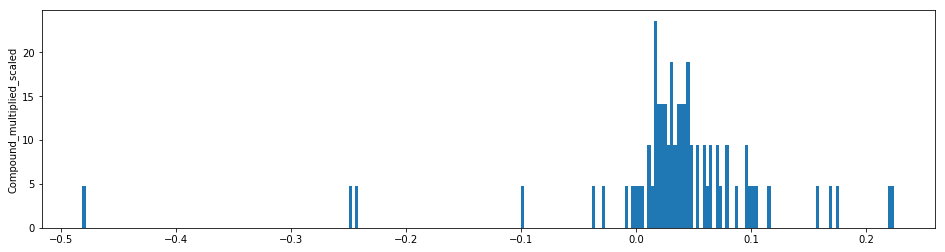

In [26]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

x = df_full['Compound_multiplied_scaled']
plt.hist(x, normed=True, bins=250)
plt.ylabel('Compound_multiplied_scaled');

In [27]:
writer_df = pd.ExcelWriter('df_full.xlsx', engine='xlsxwriter')
df_full.to_excel(writer_df)
writer_df.save()

os.rename('df_full.xlsx', '$'+stock+'.xlsx') # UPDATE THE $CASHTAG BEFORE RUNNING THE CELL!!!!